# **Money Supply**

### **Summary:**

#### **Purpose:** API Code that pulls money supply data directly from the Federal Reserve Economid Data (FRED) and graphs the latest data. I offer comments of the recent historic inflation cycle caused by pandemic stimulus.

- **M1 Money Supply:** The most liquid forms of money, including currency, demand deposits, and other checkable deposits.
- **Measurement:** The U.S. money supply is measured by different aggregates (M1, M2, etc.), each reflecting varying degrees of liquidity. M1 is the narrowest measure, while M2 is broader, including near-money assets.
- **Use:** The money supply is a critical factor in monetary policy, influencing interest rates, inflation, and economic stability.




#### **Step 1** - Get your API key
Please visit to learn [About API Keys](https://fredaccount.stlouisfed.org/apikeys)\
Documentation is available on https://fred.stlouisfed.org/docs/api/fred/\
Register and retrieve your API key and paste it to use in your query.

In [1]:
# Import Libraries and set parameters for api query
import requests
import json


#You'll need to enter your own API_Key after registering for it from FRED.
api_key = input('What is your API key')
file_type = 'json'
series_id = 'WM1NS'

#### **Step 2** Estbalish connection, set parameters, and request data from API

- Pull Information about the series
- Pull observations from the series

*Pull Information about the series*

In [114]:

#parameters:
base_url_series = 'https://api.stlouisfed.org/fred/series'
url_series = f'{base_url_series}?series_id={series_id}&api_key={api_key}&file_type={file_type}'

# Send API request
response = requests.get(url_series)

# Convert HTTP request to dictionary using the .json method
response_dict = response.json()

# Print the object
print(type(response_dict))

# Print the full response
for key in response_dict:
    print(key, ":", response_dict[key])
print('\n')

# Prints it in a vertical format for easier reading
import pprint
series_dict = response_dict['seriess']
for series_key2 in series_dict:
    pprint.pprint(series_key2)


<class 'dict'>
realtime_start : 2024-08-28
realtime_end : 2024-08-28
seriess : [{'id': 'WM1NS', 'realtime_start': '2024-08-28', 'realtime_end': '2024-08-28', 'title': 'M1', 'observation_start': '1975-01-06', 'observation_end': '2024-08-05', 'frequency': 'Weekly, Ending Monday', 'frequency_short': 'W', 'units': 'Billions of Dollars', 'units_short': 'Bil. of $', 'seasonal_adjustment': 'Not Seasonally Adjusted', 'seasonal_adjustment_short': 'NSA', 'last_updated': '2024-08-27 12:02:55-05', 'popularity': 70, 'notes': 'Before May 2020, M1 consists of (1) currency outside the U.S. Treasury, Federal Reserve Banks, and the vaults of depository institutions; (2) demand deposits at commercial banks (excluding those amounts held by depository institutions, the U.S. government, and foreign banks and official institutions) less cash items in the process of collection and Federal Reserve float; and (3) other checkable deposits (OCDs), consisting of negotiable order of withdrawal, or NOW, and automati

*Pull observations from series*

In [115]:
import requests
import json

# example url: 'https://api.stlouisfed.org/fred/series/observations?series_id=GNPCA&api_key=xxxxxxxxxxxxx&file_type=json'
base_url_obs = 'https://api.stlouisfed.org/fred/series/observations'

# url with dynamic string
url1 = f'{base_url_obs}?series_id={series_id}&api_key={api_key}&file_type={file_type}'

response = requests.get(url1)
response_dict = response.json()

print(type(response_dict))

for key in response_dict:
    print(key, ":", response_dict[key])

print('\n')

for obs_key in response_dict['observations']:
    print(obs_key, ":")



<class 'dict'>
realtime_start : 2024-08-27
realtime_end : 2024-08-27
observation_start : 1600-01-01
observation_end : 9999-12-31
units : lin
output_type : 1
file_type : json
order_by : observation_date
sort_order : asc
count : 2588
offset : 0
limit : 100000
observations : [{'realtime_start': '2024-08-27', 'realtime_end': '2024-08-27', 'date': '1975-01-06', 'value': '286.5'}, {'realtime_start': '2024-08-27', 'realtime_end': '2024-08-27', 'date': '1975-01-13', 'value': '282.2'}, {'realtime_start': '2024-08-27', 'realtime_end': '2024-08-27', 'date': '1975-01-20', 'value': '279.1'}, {'realtime_start': '2024-08-27', 'realtime_end': '2024-08-27', 'date': '1975-01-27', 'value': '270.9'}, {'realtime_start': '2024-08-27', 'realtime_end': '2024-08-27', 'date': '1975-02-03', 'value': '271.1'}, {'realtime_start': '2024-08-27', 'realtime_end': '2024-08-27', 'date': '1975-02-10', 'value': '271.0'}, {'realtime_start': '2024-08-27', 'realtime_end': '2024-08-27', 'date': '1975-02-17', 'value': '270.8'}

In [116]:
import pandas as pd
obs_list = response_dict['observations']
obs_df = pd.DataFrame(obs_list)

print(obs_df.head())

  realtime_start realtime_end        date  value
0     2024-08-27   2024-08-27  1975-01-06  286.5
1     2024-08-27   2024-08-27  1975-01-13  282.2
2     2024-08-27   2024-08-27  1975-01-20  279.1
3     2024-08-27   2024-08-27  1975-01-27  270.9
4     2024-08-27   2024-08-27  1975-02-03  271.1


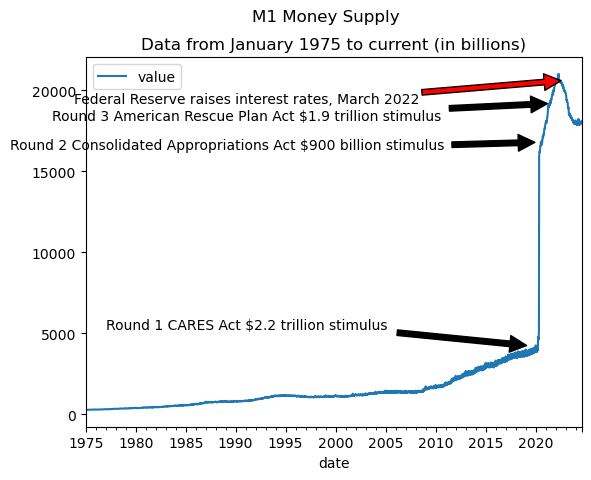

In [117]:
import matplotlib.pyplot as plt
obs_df['date'] = pd.to_datetime(obs_df['date'])
obs_df['value'] = pd.to_numeric(obs_df['value'])

obs_df.plot(x='date', y='value', kind='line')

#metadata
plt.suptitle('M1 Money Supply')
plt.title('Data from January 1975 to current (in billions)')
plt.annotate('Round 1 CARES Act $2.2 trillion stimulus', xy=(2600, 4200), xytext=(1100, 5100),
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center', verticalalignment='bottom')
plt.annotate('Round 2 Consolidated Appropriations Act $900 billion stimulus', xy=(2630, 16800), xytext=(1000, 16200),
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center', verticalalignment='bottom')
plt.annotate('Round 3 American Rescue Plan Act $1.9 trillion stimulus', xy=(2700, 19200), xytext=(1100, 18000),
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center', verticalalignment='bottom')
plt.annotate('Federal Reserve raises interest rates, March 2022', xy=(2740, 20600), xytext=(1100, 19000),
             arrowprops=dict(facecolor='red'),
             horizontalalignment='center', verticalalignment='bottom')
#show the plot
plt.show()

### How much was paid in each of the three rounds?

[Pandemic Oversight](https://www.pandemicoversight.gov/data-interactive-tools/data-stories/update-three-rounds-stimulus-checks-see-how-many-went-out-and)

- Round 1, March 2020: $1,200 per income tax filer, $500 per child (CARES Act)
- Round 2, December 2020: $600 per income tax filer, $600 per child (Consolidated Appropriations Act, 2021)
- Round 3, March 2021: $1,400 per income tax filer, $1,400 per child (American Rescue Plan Act)

In March 2022, the Fed reversed course with a period of quantitative tightening to combat record inflation [caused by](https://crsreports.congress.gov/product/pdf/R/R47115):
- low unemployment
- pent-up consumer demand
- supply chain issues
- [Russia Invading Ukraine](https://en.wikipedia.org/wiki/Russian_invasion_of_Ukraine) putting pressure on Energy prices

In [118]:
%reset -f

### **How Is the Money Supply Used?**

- **Monetary Policy:** The Federal Reserve uses the money supply as a tool to implement monetary policy. By adjusting the money supply (through open market operations, reserve requirements, and the discount rate), the Fed influences interest rates, inflation, and overall economic activity.
  
- **Economic Indicators:** Changes in the money supply are closely monitored as they can indicate future economic conditions like inflation or recession. For example, a rapid increase in the money supply might suggest rising inflationary pressures.

# <h1><center>**APPENDIX**</center></h1>


### **M1 Money Supply:**

**M1** is a category of the money supply that includes the most liquid and easily accessible forms of money. It represents the money that is readily available for spending and includes:

1. **Currency in Circulation:** This is the physical money (coins and paper currency) that is held by the public (excluding the currency held by the U.S. Treasury and Federal Reserve banks).
   
2. **Demand Deposits:** These are the balances in checking accounts that can be accessed on demand without any restrictions. These include traditional checking accounts as well as NOW (Negotiable Order of Withdrawal) accounts that allow interest to be earned.

3. **Other Checkable Deposits:** This includes deposits in credit unions, savings and loans, and mutual savings banks that can also be accessed using checks or debit cards.

4. **Traveler's Checks (Non-Bank Issued):** These are a small component of M1 but are included as they represent funds that can be easily converted to cash or used for transactions.





### **How Is the Money Supply Measured in the US?**

The money supply in the U.S. is measured by several aggregates, which include different categories of money based on liquidity. The Federal Reserve (the central bank of the U.S.) monitors and publishes these aggregates regularly.

#### **1. M1 (Narrow Money):**
   - **Definition:** As described above, M1 includes the most liquid forms of money—currency in circulation, demand deposits, other checkable deposits, and traveler's checks.
   - **Importance:** M1 is a measure of the money supply that reflects the money most easily accessible for transactions.

#### **2. M2 (Broad Money):**
   - **Definition:** M2 includes all of M1 plus additional forms of money that are less liquid but still can be converted into cash or used for transactions relatively easily.
   - **Components:**
     - **Savings Deposits:** Money in savings accounts, which can be withdrawn or transferred to checking accounts, although less easily than demand deposits.
     - **Time Deposits (Under $100,000):** These are certificates of deposit (CDs) with a fixed term and interest rate, which are less liquid than savings deposits.
     - **Retail Money Market Funds:** These are mutual funds that invest in short-term debt securities and are considered liquid assets.
   - **Importance:** M2 is a broader measure of the money supply that includes near-money (money that isn't as liquid as M1 but can still be quickly converted into cash).

#### **3. M3 (No Longer Published by the Federal Reserve):**
   - **Definition:** M3 used to include all of M2 plus larger time deposits, institutional money market funds, and other large liquid assets.
   - **Importance:** Although M3 was discontinued in 2006, it was a broader measure that included very large and less liquid assets. Some economists still monitor similar aggregates independently.

#### **4. Other Measures:**
   - **Monetary Base (M0):** This is the sum of currency in circulation and reserves held by banks at the Federal Reserve. It represents the foundation upon which the money supply is built.
   - **L (Liquid Money):** This is a very broad measure of money that includes all assets that can quickly be turned into cash.

In [119]:
%reset -f